# Model selection

In [34]:
import pickle
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

In [2]:
data_dict = pickle.load(open("/Users/cbautistap/Dropbox/MCD/Cursos/primavera-2021/dpa/dpa-project/temp/feature-engineering-dataset-2021-02-22-training.pkl",'rb'))

In [3]:
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']

In [4]:
X_train

,latitude,longitude,num_violations,inspection_type_canvas,inspection_type_complaint,inspection_type_consultation,inspection_type_license,inspection_type_other,inspection_type_suspected_food_poisoning,inspection_type_tag_removal,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.779334,0.692654,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.842031,0.612486,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.842031,0.612486,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.780492,0.375282,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.674190,0.735664,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161753,0.742845,0.416900,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161754,0.539826,0.487070,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161755,0.595704,0.707180,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161756,0.493807,0.622472,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y_train

0         1
1         1
2         1
3         1
4         0
         ..
161753    0
161754    1
161755    1
161756    0
161757    1
Name: results, Length: 161758, dtype: int64

## Magic loop

In [6]:
#algorithms_dict = {'tree': 'tree_grid_search',
#                  'random_forest': 'rf_grid_search'}

#grid_search_dict = {'tree_grid_search': {'max_depth': [5,10,15], 
#                                         'min_samples_leaf': [3,5,7]},
#                   'rf_grid_search': {'n_estimators': [100,500,1000],  
#                                      'max_depth': [5,10], 
#                                      'min_samples_split':[3,5],
#                                      'max_features': [10,15,20],
                                      #'min_samples_leaf': [3,5],
#                                      'criterion': ['gini']}}

#estimators_dict = {'tree': DecisionTreeClassifier(random_state=1111),
#                  'random_forest': RandomForestClassifier(oob_score=True, random_state=2222)}

In [7]:
algorithms_dict = {'tree': 'tree_grid_search',
                  'random_forest': 'rf_grid_search'}

grid_search_dict = {'tree_grid_search': {'max_depth': [5,10,15], 
                                         'min_samples_leaf': [3,5,7]},
                   'rf_grid_search': {'n_estimators': [300,400],  
                                      #'min_samples_leaf': [3,5],
                                      'max_depth':[7,10],
                                      'min_samples_split':[3],
                                      'max_features': [10,15,20],
                                      'criterion': ['gini']}}

estimators_dict = {'tree': DecisionTreeClassifier(random_state=1111),
                   'random_forest': RandomForestClassifier(oob_score=True, random_state=2222)}

In [8]:
def magic_loop(algorithms, features, labels):
    best_estimators = []
    for algorithm in algorithms:
        estimator = estimators_dict[algorithm]
        grid_search_to_look = algorithms_dict[algorithm]
        grid_params = grid_search_dict[grid_search_to_look]
        
        gs = GridSearchCV(estimator, grid_params, scoring='roc_auc', cv=5, n_jobs=-1)
        
        #train
        gs.fit(features, labels)
        #best estimator
        best_estimators.append(gs)
        
        
    return best_estimators

In [9]:
#def magic_loop(algorithms, features, labels):
#    best_estimators = []
#    for algorithm in algorithms:
#        estimator = estimators_dict[algorithm]
#        grid_search_to_look = algorithms_dict[algorithm]
#        grid_params = grid_search_dict[grid_search_to_look]
#        
#        gs = GridSearchCV(estimator, grid_params, scoring='precision', cv=5, n_jobs=-1)
#        
#        #train
#        gs.fit(features, labels)
#        #best estimator
#        best_estimators.append(gs)
#        
#        
#    return best_estimators

In [10]:
algorithms = ['tree','random_forest']
start_time = time.time()
best = magic_loop(algorithms, X_train, y_train)
#best[0].best_estimator_
print("Tiempo en ejecutar: ", time.time() - start_time)

Tiempo en ejecutar:  871.9854776859283


La mejor configuración del Decission Tree es:

In [11]:
best_t = best[0].best_estimator_
best_t

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=1111)

La mejor configuración del Random Forest es:

In [12]:
best_rf = best[1].best_estimator_
best_rf

RandomForestClassifier(max_depth=10, max_features=20, min_samples_split=3,
                       n_estimators=400, oob_score=True, random_state=2222)

**Para definir el mejor modelo evaluamos el modelo con mejor AUC**

El score de Decission Tree es:

In [13]:
best[0].best_score_
#best_t.best_score_

0.804196173180016

El score de Random Forest es

In [14]:
best[1].best_score_
#best_t.best_score_

0.8064091178132321

Por lo que el mejor modelo, aunque marginalmente, es el RF

**Hacemos predicciones con el mejor modelo, para después cambiar el threshold**

## Model evaluation

In [40]:
# entrenamos con el mejor del algoritmo Tree
best_t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=1111)

In [41]:
# hacemos predicción para Tree
labels_t = best_t.predict(X_test)

In [42]:
# generamos scores
labels_scores_t = best_t.predict_proba(X_test)

In [63]:
labels_scores_t

array([[0.06017812, 0.93982188],
       [0.44299674, 0.55700326],
       [0.67616624, 0.32383376],
       ...,
       [0.42361336, 0.57638664],
       [0.06017812, 0.93982188],
       [0.11141319, 0.88858681]])

Generamos curva ROC y calculamos AUC para el mejor modelo del algoritmo Tree

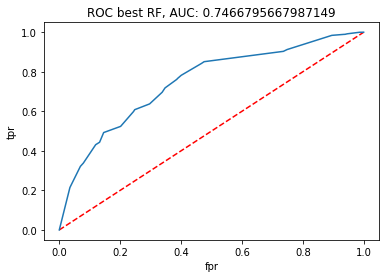

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

fpr_t, tpr_t, thresholds_t = roc_curve(y_test, labels_scores_t[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr_t, tpr_t)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, labels_scores_t[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

**Ahora para el RF**

In [44]:
# entrenamos con el mejor del algoritmo FR
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_split=3,
                       n_estimators=400, oob_score=True, random_state=2222)

In [45]:
# hacemos predicción para RF
labels_rf = best_rf.predict(X_test)

In [46]:
# generamos scores
labels_scores_rf = best_rf.predict_proba(X_test)

Generamos curva ROC y calculamos AUC para el mejor modelo del algoritmo RF

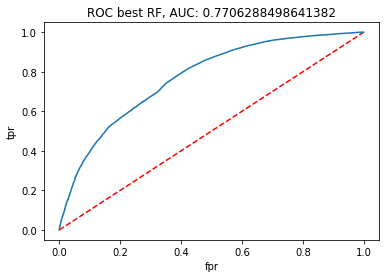

In [47]:
#from sklearn.metrics import roc_curve, roc_auc_score

#import matplotlib.pyplot as plt

%matplotlib inline

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, labels_scores_rf[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr_rf, tpr_rf)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, labels_scores_rf[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

## Métricas de desempeño

Queremos escoger el theshold adecuado. Debido al tipo de problema, queremos que los falsos positivos (fpr) sean menores al 5%.

In [48]:
#### Precision, recall, thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_2 = precision_recall_curve(y_test, labels_scores_rf[:,1], pos_label=1)

In [49]:
thresholds_2 = np.append(thresholds_2, 1)
(precision.shape, recall.shape, thresholds_2.shape)

((51526,), (51526,), (51526,))

In [50]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [52]:
metrics_report = get_metrics_report(fpr_rf, tpr_rf, thresholds_rf, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.071639,0.657400,1.000000,0.793291,1.000000,0.988396,0.011604,0.000000
1,0.073195,0.657393,0.999972,0.793277,0.999972,0.988396,0.011604,0.000028
2,0.098438,0.657504,0.999972,0.793357,0.999972,0.987913,0.012087,0.000028
3,0.135855,0.657497,0.999943,0.793344,0.999943,0.987913,0.012087,0.000057
4,0.139893,0.657558,0.999943,0.793388,0.999943,0.987644,0.012356,0.000057
...,...,...,...,...,...,...,...,...
20385,0.902252,1.000000,0.000283,0.000566,0.000283,0.000000,1.000000,0.999717
20386,0.902682,1.000000,0.000198,0.000396,0.000198,0.000000,1.000000,0.999802
20387,0.903428,1.000000,0.000142,0.000283,0.000142,0.000000,1.000000,0.999858
20388,0.905170,1.000000,0.000057,0.000113,0.000057,0.000000,1.000000,0.999943


¿Cuál es el threshold que tendríamos que escoger para que no tengamos más de 5% de FP?

In [55]:
negocio = metrics_report[metrics_report.fpr <= 0.05]
negocio

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
18262,0.830743,0.904908,0.250673,0.392592,0.250673,0.049960,0.950040,0.749327
18263,0.830749,0.904889,0.250616,0.392520,0.250616,0.049960,0.950040,0.749384
18264,0.830753,0.904981,0.250616,0.392529,0.250616,0.049906,0.950094,0.749384
18265,0.830822,0.904737,0.249908,0.391637,0.249908,0.049906,0.950094,0.750092
18266,0.830826,0.904830,0.249908,0.391646,0.249908,0.049852,0.950148,0.750092
...,...,...,...,...,...,...,...,...
20385,0.902252,1.000000,0.000283,0.000566,0.000283,0.000000,1.000000,0.999717
20386,0.902682,1.000000,0.000198,0.000396,0.000198,0.000000,1.000000,0.999802
20387,0.903428,1.000000,0.000142,0.000283,0.000142,0.000000,1.000000,0.999858
20388,0.905170,1.000000,0.000057,0.000113,0.000057,0.000000,1.000000,0.999943


**Generamos nuevo punto de corte**

In [57]:
punto_corte = negocio.head(1).threshold.values[0]
punto_corte

0.8307426680678524

In [59]:
new_labels = [0 if score < punto_corte else 1 for score in labels_scores_rf[:,1]]

In [60]:
new_labels[:10]

[1, 0, 0, 1, 0, 1, 1, 1, 0, 0]

In [61]:
pd.Series(new_labels).sum()

9780

### Generamos las predicciones con el mejor modelo del RandomForestClassifier para nuestro conjunto de prueba

Hacemos predicciones

In [23]:
#predicted_labels = best_1.predict(X_test)

Calculamos scores con el mejor predictor

In [24]:
#predicted_scores = best_1.predict_proba(X_test)

In [25]:
#predicted_scores

Queremos ver cual es el score mínimo (esperamos que haya al menos uno con score > 0.5 para ver que está clasificando)

In [26]:
#best_1.classes_

In [27]:
#a = pd.DataFrame(predicted_scores,columns=['not_pass','pass'])
#min(a['not_pass'])

**Generamos la curva ROC y calculamos el AUC**

In [28]:
#from sklearn.metrics import roc_curve, roc_auc_score

#import matplotlib.pyplot as plt

#%matplotlib inline

#fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

#plt.clf()
#plt.plot([0,1],[0,1], 'k--', c="red")
#plt.plot(fpr, tpr)
#plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
#plt.xlabel("fpr")
#plt.ylabel("tpr")
#plt.show()